# Magnetic and Diagenetic Analyses of Kawamura (2009)
_____

Paper doi: 10.2204/iodp.proc.303306.209.2009

Core: IODP Expedition 303 Sites U1302/U1303 (50°10′N, 45°38.3′W)

Water depth: 3565 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry.

Age model paper: https://doi.org/10.1016/j.epsl.2011.11.029

---
These 2 sites are ~6.5 km apart, and are grouped together in pretty much all of the IODP reports and other studies. So I'm plotting them together. Throughout this entire expedition, things are reported in mbsf and mcd. In the past, I have just been using mbsf. But since everything is available in mcd, I'm using that for these sites (this file, plus 1304 and 1308).

1302 and 1303 have a shipboard composite depth scale, plus a "sampling" depth scale. The age data is in sampling mcd, while the other data is in shipboard mcd. Leaving the discrepancy mainly because I see no easy way to convert from sampling to shipboard. Not ideal, but discrepancy is ~3-5 m, which is comparable to Ms data resolution.

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magn = pd.read_excel("data/kawamura2009/1302-3.xlsx", sheet_name="1302-3 Ms")
geochem = pd.read_excel("data/kawamura2009/1302-3.xlsx", sheet_name="geochem")
toc = pd.read_excel("data/kawamura2009/1302-3.xlsx", sheet_name="toc")
ages = pd.read_excel("data/kawamura2009/1302-3.xlsx", sheet_name="ages")

# unit adjustments
# there is a scaling factor for each Ms measurement, plus the usual conversion to magnetite
# also convert ages from ka to Ma
magn["Magnetite [ppm]"] = (magn["Ms (Am^2/kg)"] * 10**6) / (92 * (10 ** magn["Negative Factor"]))
ages["Age [Ma]"] = ages["Age [ka]"] / 1000

In [3]:
# calculate sed rates
sed_rates = data_fns.sed_rates(ages["Age [Ma]"], ages["Depth [sample mcd]"])

In [4]:
# combine stuff together
# calling depth column "mbsf" because my library of plotting functions
#  like that better. convert back to mcd at end
magn_df = pd.DataFrame({"Depth [mbsf]":magn["Depth (ship mcd)"], "Magnetite [ppm]":magn["Magnetite [ppm]"]})
geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["Depth (ship mcd)"], "Sulfate [mM]":geochem["Sulfate (mM)"], "Fe 2+ [uM]":geochem["Fe 2+ [uM]"]})
toc_df = pd.DataFrame({"Depth [mbsf]":toc["Depth (ship mcd)"], "TOC [wt. %]":toc["TOC (wt. %)"]})
seds_df = pd.DataFrame({"Depth [mbsf]":ages["Depth [sample mcd]"], "Sedimentation Rate [m/Myr]":sed_rates})

comb_df = pd.concat([magn_df, geochem_df, toc_df, seds_df]).sort_values(by="Depth [mbsf]").reset_index(drop=True)

# there are some rows with all nans, due to the input data
# dropping those now for cleanliness and so that interpolation works
comb_df.dropna(subset=["Depth [mbsf]"], inplace=True)


In [5]:
# interpolate
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"])

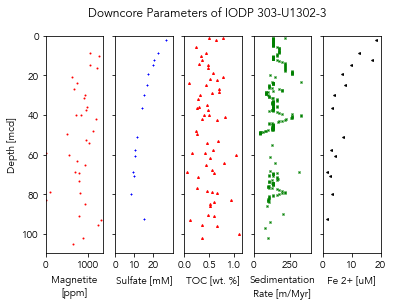

In [6]:
# downcore plots
colors = ["r", "b", "r", "g", "k"]
markers = [".", "+", "^", "x", "<"]
comp_markers = [".", ".", ".", "."]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Myr]", "Fe 2+ [uM]"], comb_df, colors, markers)
dc_fig.suptitle("Downcore Parameters of IODP 303-U1302-3", x=0.5)
dc_axs[0].set_ylabel("Depth [mcd]")
dc_axs[0].set_xlabel("Magnetite\n[ppm]")
dc_axs[3].set_xlabel("Sedimentation\nRate [m/Myr]")
dc_axs[3].set_xlim(0, 400)
dc_axs[2].set_xticks([0, 0.5, 1.0])
dc_axs[4].set_xticks([0, 10, 20])
dc_axs[1].set_xlim(0, 30)
dc_axs[1].set_xticks([0, 10, 20])
dc_fig.savefig("outputs/kawamura2009/1302-3/dc-zoom-aug23.pdf", bbox_inches="tight")

[Text(0.5, 0, 'Magnetite [ppm]'),
 Text(0, 0.5, 'Sedimentation Rate [m/Ma]'),
 Text(0.5, 1.0, 'Sedimentation Rate vs Magnetite'),
 (0.0, 400.0)]

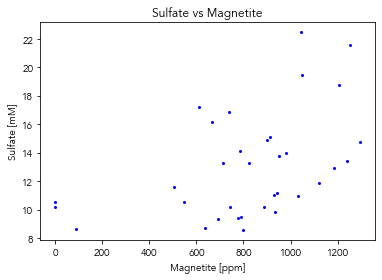

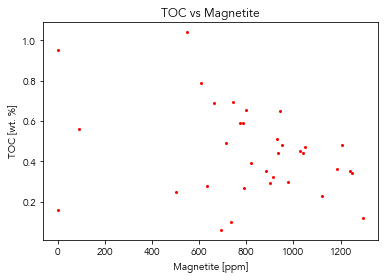

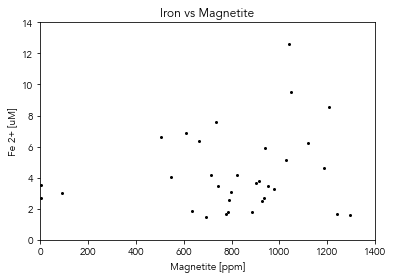

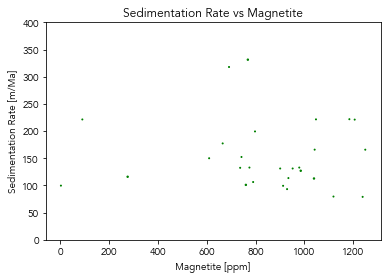

In [8]:
# comparison plots
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]", "Fe 2+ [uM]"], interpolated, ["b", "r", "k"], comp_markers, markersize=4)
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite")
comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite")
comp_axs[2].set(xlabel="Magnetite [ppm]", ylabel="Fe 2+ [uM]", title="Iron vs Magnetite", ylim=[0,14], xlim=[0,1400])
#comp_figs[0].savefig("outputs/kawamura2009/1302-3/sulf-comp.pdf")
#comp_figs[1].savefig("outputs/kawamura2009/1302-3/toc-comp.pdf")
comp_figs[2].savefig("outputs/kawamura2009/1302-3/iron-comp.pdf")


# plot the sed rate comp plot separately, since it has a different presentation
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Myr]", title = "Sedimentation Rate vs Magnetite", ylim=(0,400))
#sed_fig.savefig("outputs/kawamura2009/1302-3/sed-comp.pdf")

In [13]:
# write data to compilations
# first we have to rename the depth columns to mcd instead of mbsf
# we used mbsf above b/c it works nicely with data_fns.py
comb_df.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)
interpolated.rename(columns={"Depth [mbsf]":"Depth [mcd]"}, inplace=True)

In [14]:
data_fns.write_output(comb_df, "IODP 303-U1302-3", "data/comp_raw.xlsx")
data_fns.write_output(interpolated, "IODP 303-U1302-3", "data/comp_inter.xlsx")